Link to notebook:

https://n9.cl/aprendizajenosupervisado

Link to database utilized:

https://drive.google.com/drive/folders/1vXBUIWBS3_-Ez0LzCYEcOx2SzWQv0bwU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Modelación con IA TC2034/E2/dataset.csv')

#K-Means and DBSCAN

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

#Determining the optimal number of clusters for K-Means

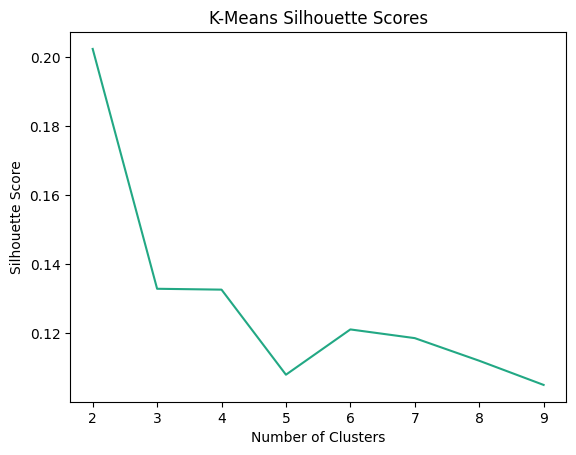

Optimal K-Means parameters: n_clusters=2, silhouette_score=0.2023


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# List to store silhouette scores for each number of clusters
silhouette_scores = []

# Iterate over a range of cluster numbers from 2 to 9
for n_clusters in range(2, 10):
    # Create a KMeans model with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

    # Fit the model and predict cluster labels
    kmeans_labels = kmeans.fit_predict(scaled_data)

    # Compute silhouette score
    score = silhouette_score(scaled_data, kmeans_labels)

    # Append the silhouette score to the list
    silhouette_scores.append(score)

# Find the index of the maximum silhouette score
optimal_clusters_index = silhouette_scores.index(max(silhouette_scores))

# Determine the optimal number of clusters based on the index
optimal_clusters = optimal_clusters_index + 2  # Adding 2 because range starts from 2, not 0

# Retrieve the optimal silhouette score
optimal_silhouette_score = silhouette_scores[optimal_clusters_index]

# Define line color for the plot
line_color = '#22A884FF'

# Plot the silhouette scores
plt.plot(range(2, 10), silhouette_scores, color=line_color)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("K-Means Silhouette Scores")
plt.show()

# Print the optimal K-Means parameters
print(f"Optimal K-Means parameters: n_clusters={optimal_clusters}, silhouette_score={optimal_silhouette_score:.4f}")


#Determining the Optimal Number of Clusters for DBSCAN

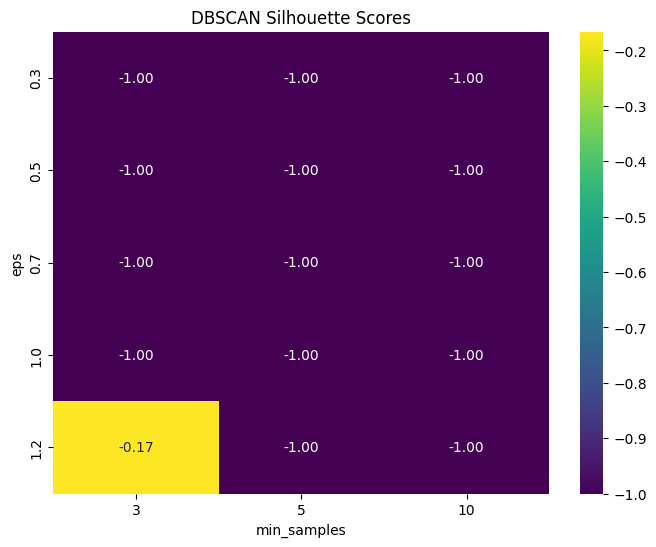

Optimal DBSCAN parameters: eps=1.2, min_samples=3.0, silhouette_score=-0.1660, n_clusters=4.0


In [ ]:
import seaborn as sns

# Define parameter ranges
eps_values = [0.3, 0.5, 0.7, 1.0, 1.2]
min_samples_values = [3, 5, 10]
dbscan_scores = []

# Evaluate DBSCAN for different parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaled_data)
        n_labels = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        if n_labels > 1:
            score = silhouette_score(scaled_data, dbscan_labels)
            dbscan_scores.append((eps, min_samples, score, n_labels))
        else:
            dbscan_scores.append((eps, min_samples, -1, n_labels))

# Convert to DataFrame for easier visualization
dbscan_scores_df = pd.DataFrame(dbscan_scores, columns=['eps', 'min_samples', 'silhouette_score', 'n_clusters'])
dbscan_scores_df_pivot = dbscan_scores_df.pivot_table(index="eps", columns="min_samples", values="silhouette_score")

# Plot heatmap of DBSCAN silhouette scores
plt.figure(figsize=(8, 6))
sns.heatmap(dbscan_scores_df_pivot, annot=True, cmap="viridis", fmt=".2f")
plt.title("DBSCAN Silhouette Scores")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

# Find the best parameters for DBSCAN
valid_scores = dbscan_scores_df[dbscan_scores_df['silhouette_score'] != -1]
optimal_dbscan_params = valid_scores.loc[valid_scores['silhouette_score'].idxmax()]
optimal_eps = optimal_dbscan_params['eps']
optimal_min_samples = optimal_dbscan_params['min_samples']
optimal_score = optimal_dbscan_params['silhouette_score']
optimal_n_clusters = optimal_dbscan_params['n_clusters']

print(f"Optimal DBSCAN parameters: eps={optimal_eps}, min_samples={optimal_min_samples}, silhouette_score={optimal_score:.4f}, n_clusters={optimal_n_clusters}")

#Visualizing the clusters

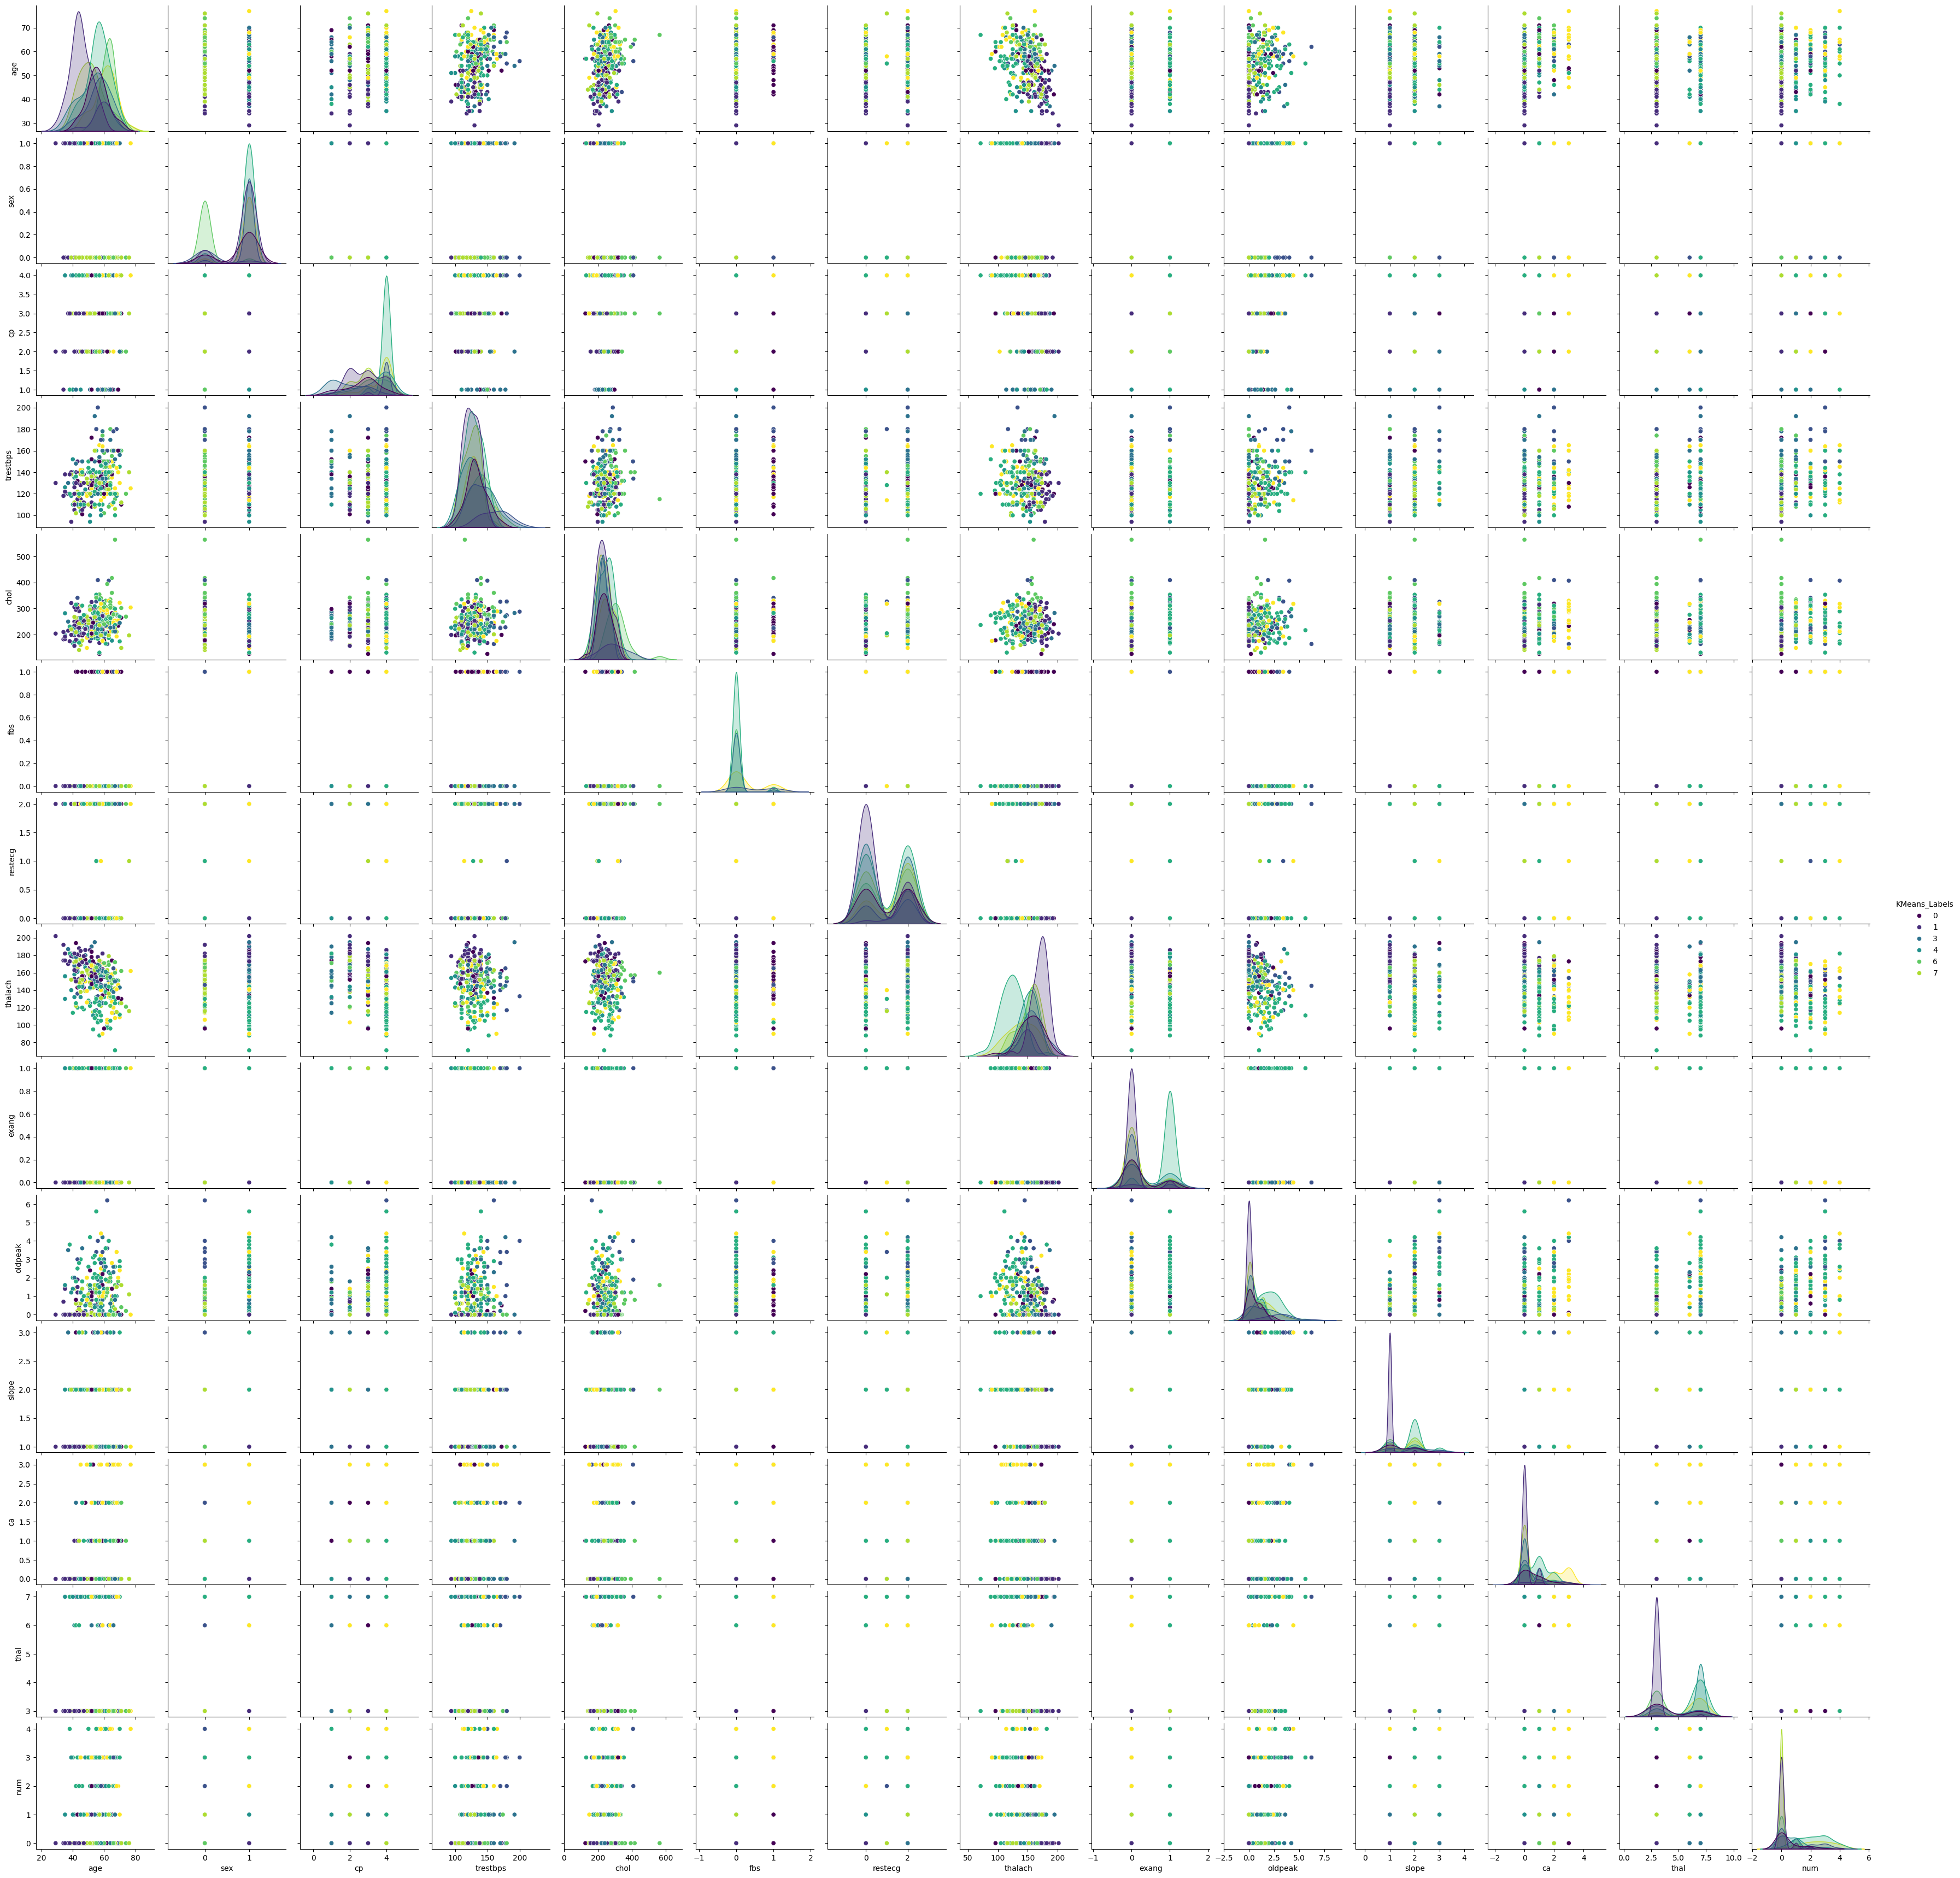

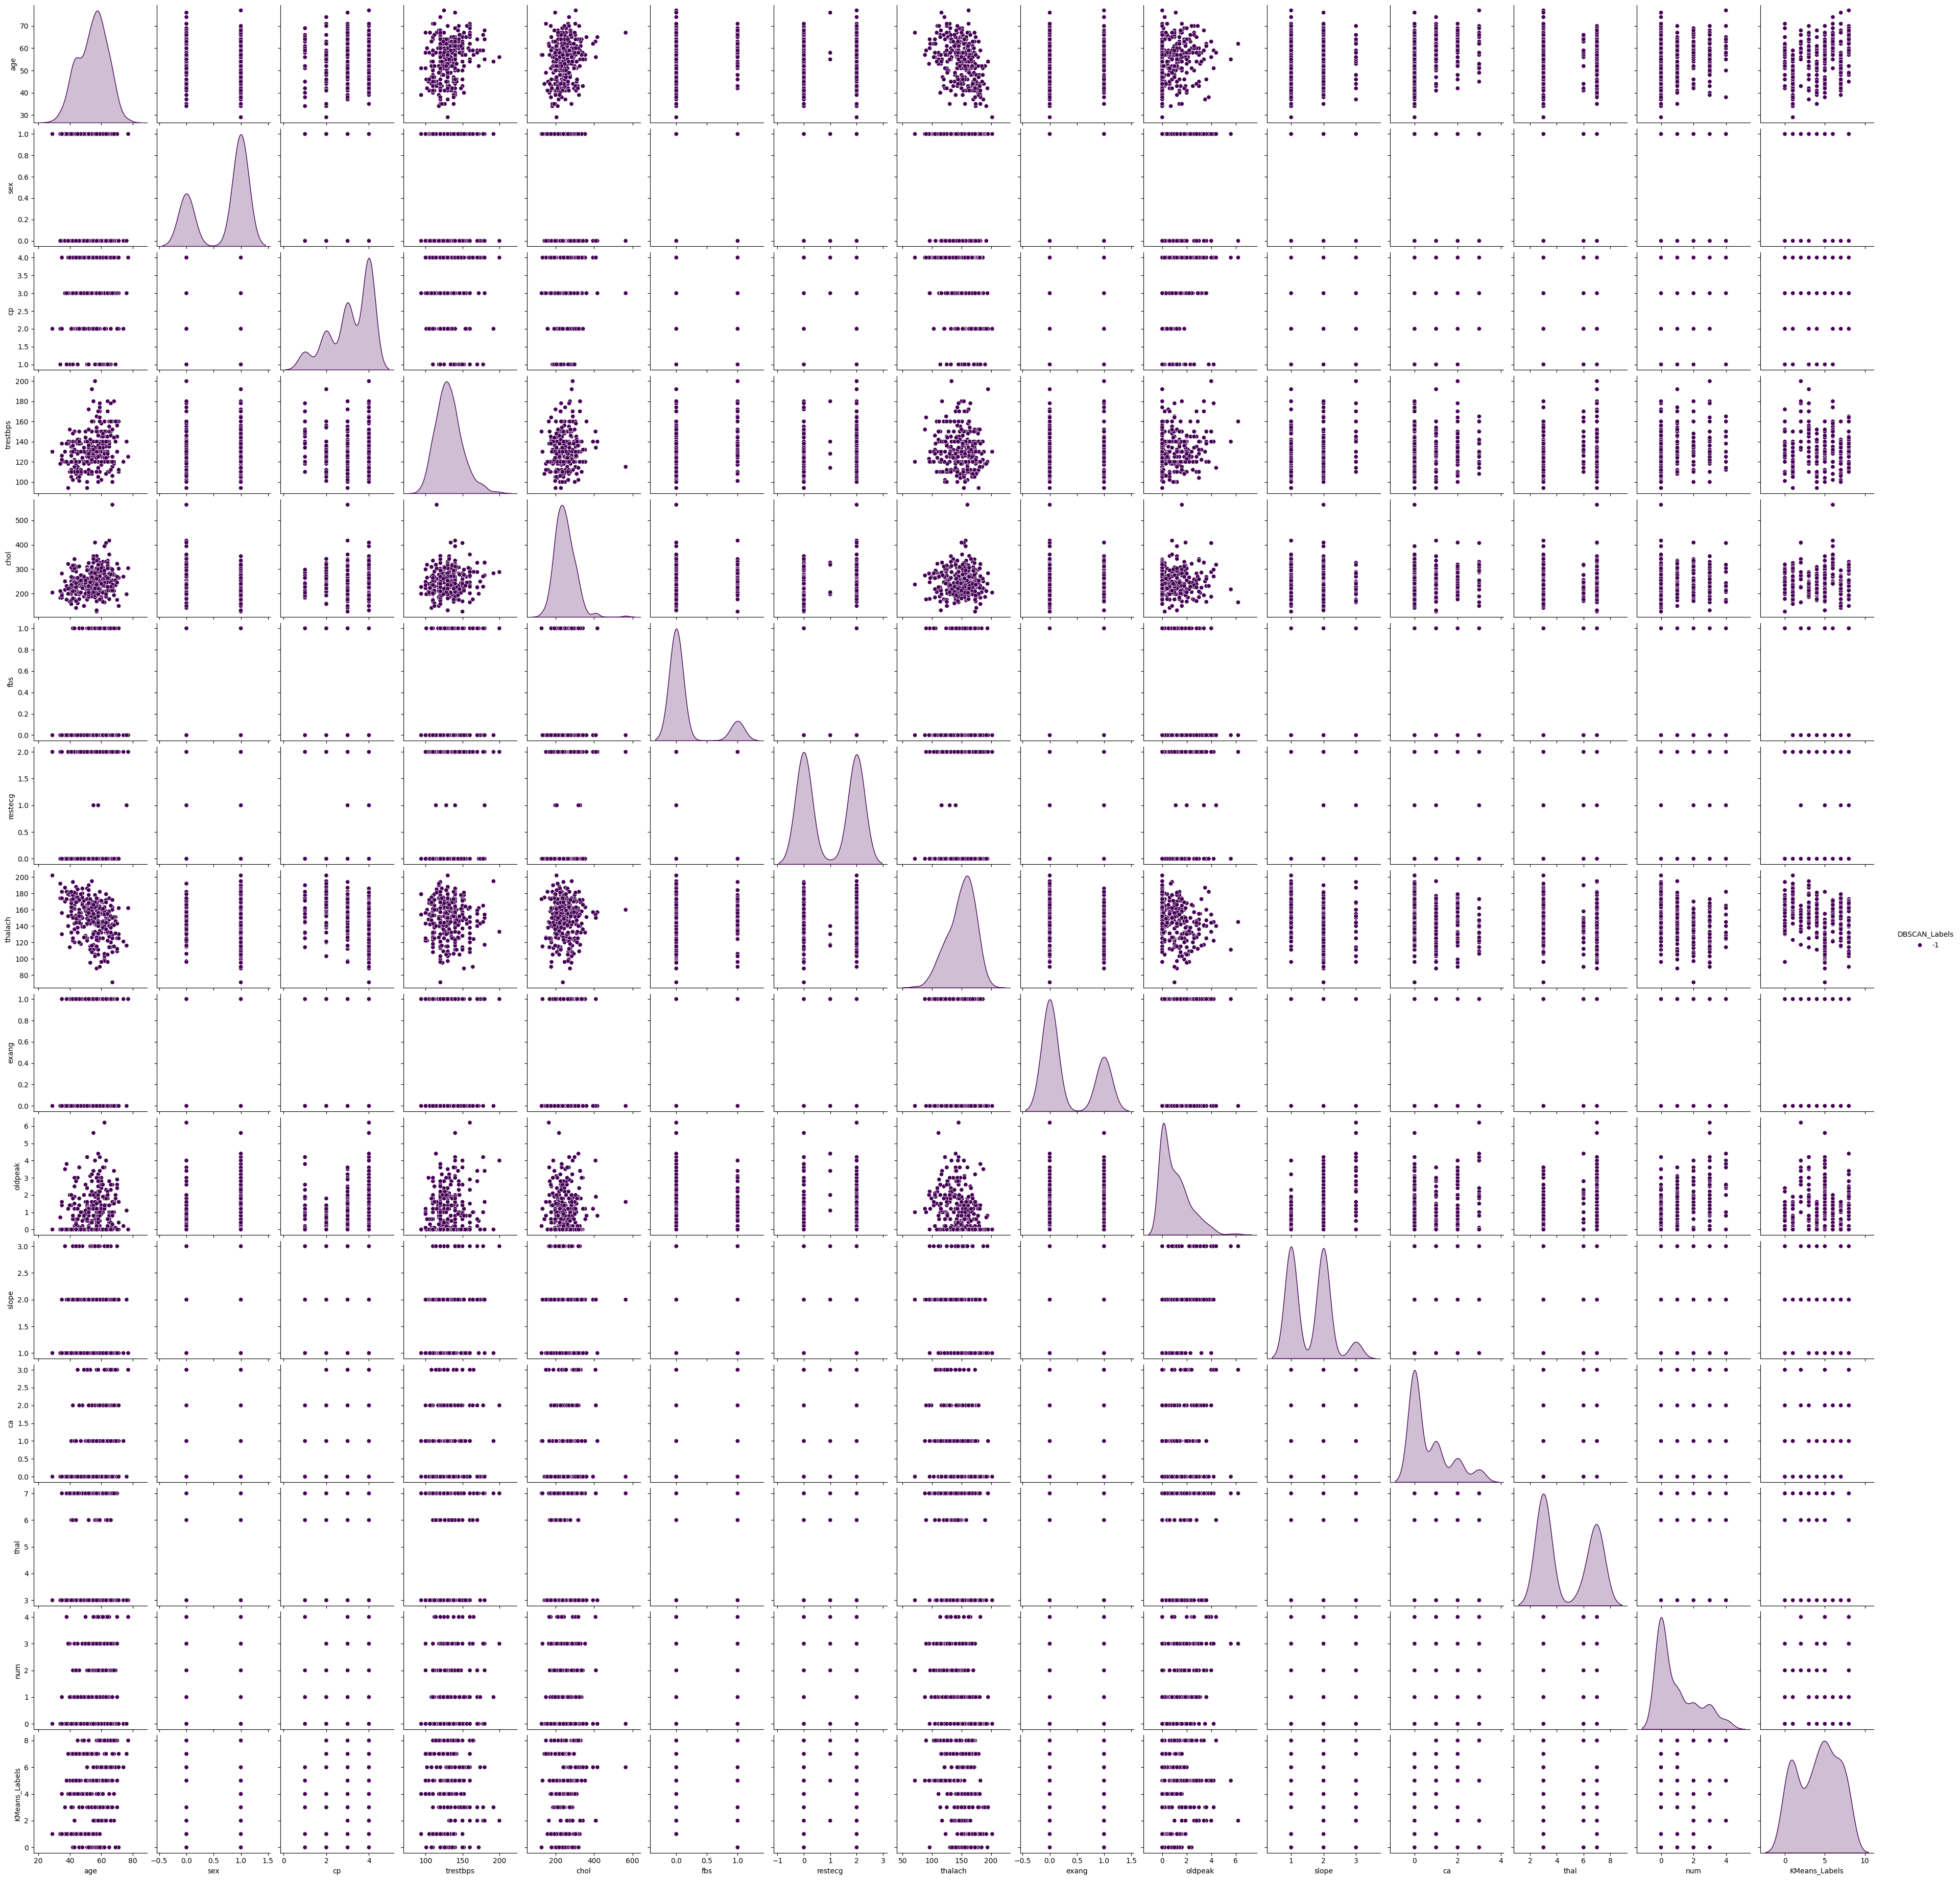

In [ ]:
# K-Means visual
df['KMeans_Labels'] = kmeans_labels
sns.pairplot(df, hue='KMeans_Labels', palette='viridis')
plt.show()

# DBSCAN visual
df['DBSCAN_Labels'] = dbscan_labels
sns.pairplot(df, hue='DBSCAN_Labels', palette='viridis')
plt.show()

#Experimenting with different hyperparameters and reporting results

In [ ]:
# Different numbers of clusters for K-Means
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, kmeans_labels)
    print(f'K-Means with n_clusters={n_clusters}: Silhouette Score = {score}')

K-Means with n_clusters=2: Silhouette Score = 0.20228993453338598
K-Means with n_clusters=3: Silhouette Score = 0.132906337949351
K-Means with n_clusters=4: Silhouette Score = 0.13265606595695906
K-Means with n_clusters=5: Silhouette Score = 0.10804878289217819
K-Means with n_clusters=6: Silhouette Score = 0.12114630451796418
K-Means with n_clusters=7: Silhouette Score = 0.11862866403012472
K-Means with n_clusters=8: Silhouette Score = 0.11209077057892239
K-Means with n_clusters=9: Silhouette Score = 0.10509298807253871
K-Means with n_clusters=10: Silhouette Score = 0.09032135027708552


In [ ]:
# Different value for eps and min samples for DBSCAN
# Here we used various other parameters initially but none of them had enough clusters to give a silhouette score, so we experiment with just one
for eps in [1.2]:
    dbscan = DBSCAN(eps=eps, min_samples=3)
    dbscan_labels = dbscan.fit_predict(scaled_data)
    n_labels = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

    if n_labels > 1:
        score = silhouette_score(scaled_data, dbscan_labels)
        print(f'DBSCAN with eps={eps}: Silhouette Score = {score}')

DBSCAN with eps=1.2: Silhouette Score = -0.16597935538874867


#Statistical summaries for clusters

In [ ]:
# Statistical summaries of clusters
from collections import defaultdict

def cluster_statistics(data, labels):
    clusters = defaultdict(list)

    # Group data points by cluster label
    for i, label in enumerate(labels):
        clusters[label].append(data[i])

    # Compute statistics for each cluster
    cluster_stats = {}
    for label, cluster_data in clusters.items():
        cluster_data = np.array(cluster_data)
        stats = {
            'Cluster': label,
            'Size': len(cluster_data),
            'Mean': np.mean(cluster_data, axis=0),
            'Median': np.median(cluster_data, axis=0),
            'Std Dev': np.std(cluster_data, axis=0),
        }
        cluster_stats[label] = stats

    return cluster_stats

# Compute statistics for K-Means clusters
kmeans_cluster_stats = cluster_statistics(scaled_data, kmeans_labels)

# Compute statistics for DBSCAN clusters
dbscan_cluster_stats = cluster_statistics(scaled_data, dbscan_labels)

# Print statistics
# We decided to comment the printing for the final delivery because the output takes up to 3 pages, and we summarize these results anyways in the written interpretation of the clusters

#print("K-Means Cluster Statistics:")
#for label, stats in kmeans_cluster_stats.items():
#    print(f"Cluster {label}:")
#    print(f"Size: {stats['Size']}")
#    print(f"Mean: {stats['Mean']}")
#    print(f"Median: {stats['Median']}")
#    print(f"Standard Deviation: {stats['Std Dev']}")
#    print()

#print("\nDBSCAN Cluster Statistics:")
#for label, stats in dbscan_cluster_stats.items():
#    print(f"Cluster {label}:")
#    print(f"Size: {stats['Size']}")
#    print(f"Mean: {stats['Mean']}")
#    print(f"Median: {stats['Median']}")
#    print(f"Standard Deviation: {stats['Std Dev']}")
#    print()


#Written interpretation of detected clusters

**Visualizing the Clusters Interpretation**

In the K-means clusters, we can see that the data is divided into fewer, more uniformly distributed clusters.

In DBSCAN, clusters reveal more complex and varied shapes, with more clusters overall.

This suggests that the data has significant density variations that K-means may oversimplify, while DBSCAN can provide a more detailed segmentation

---

**Optimal Cluster Amount:**

As seen, the optimal amount of clusters for K-means was 2, meanwhile for DBSCAN it was 4.

----

**Graph interpretations:**

The K-Means silhouette score plot shows the performance of clustering for different numbers of clusters. The silhouette score for K-Means peaks when the number of clusters is 2, with a score above 0.20. Meaning that with two clusters, the K-Means algorithm forms the most well-separated and cohesive clusters. As the number of clusters increases, the silhouette score decreases, and the clusters become less distinct and begin to overlap.

The DBSCAN silhouette score heatmap shows the clustering performance across different combinations of 'eps' (the max distance between two samples for one to be considered in the neighborhood of the other) and 'min_samples' (number of samples in a neighborhood for a point to be considered a core point). Most of the combinations result in a silhouette score of -1.00, which indicates that DBSCAN failed to form meaningful clusters. However, the combination of eps 1.2 and min_samples of 3 achieves a silhouette score of -0.17. This, nonetheless,  still suggests very poor clustering.

----

**Statistical Summary:**

*K-means*

**Cluster 3**: Has 28 members, shows moderate values with a mean close to zero for most variables, suggesting a balanced distribution. Its standard deviations indicate a fair amount of variability within the cluster. The median values are higher than the mean in several cases, which indicates a right-skewed distribution.

**Cluster 8**: Has 30 members, shows higher than average values across most variables; most notably in variables 3, 12, and 14. This is a diverse group with some members exhibiting extreme values (which can be seen in their standard deviation).

**Cluster 5**: 52 members, shows positive means for most variables. Cohesive cluster with less variation than the previous, but still significant in some variables like varibale 8 and 13.

**Cluster 7**: Has a negative mean for a lot of variables, particularly the first and second, indicating a distinct group from the others.

**Cluster 1**: 50 members with a lot of negative means, notably variable 1 and 11. Standard deviations show some diversity, highlighting diverse member profiles in this cluster.

**Cluster 2**: 12 members, with high means in variables 4, 9, and 10. The cluster's standard deviations point towards internal diversity in variables 4 and 5 (possible outliers).

**Cluster 6**: 29 members, with high means in variables 5 and 6 but low and negative in others. This suggests a mixed profile.

**Cluster 4**: 34 members and shows moderate to low mean values. The median values are higher than the mean in various cases, which suggests right-skewed distributions within the cluster.

**Cluster 0** : 28 members, with notable peaks in the 6th and 12th, indicating a wide range.

*DBSCAN*

**Cluster -1**: Significantly large size of 303 members. Encompasses a large and diverse set of data points. The standard deviation is exactly one across all variables, which means a normalized distribution. The median values show that various points lie near the mean values of the original data, which indicates that this cluster may represent the most common data points in the dataset.

#Implementing PCA and re-clustering

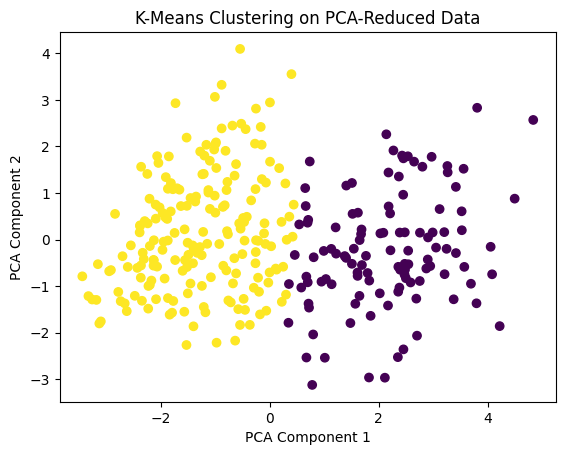

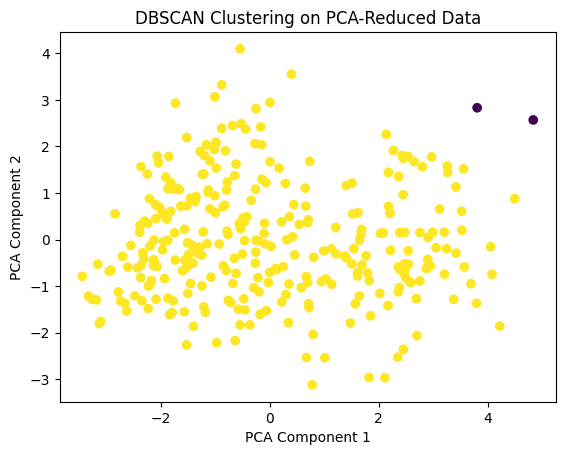

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

# Visualize PCA clusters K-Means
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.show()

# DBSCAN on PCA-reduced data
dbscan_pca = DBSCAN(eps=optimal_eps, min_samples=int(optimal_min_samples))
dbscan_pca_labels = dbscan_pca.fit_predict(pca_data)

# Visualize PCA clusters DBSCAN
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_pca_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.show()

#Comparing results obtained with and without PCA

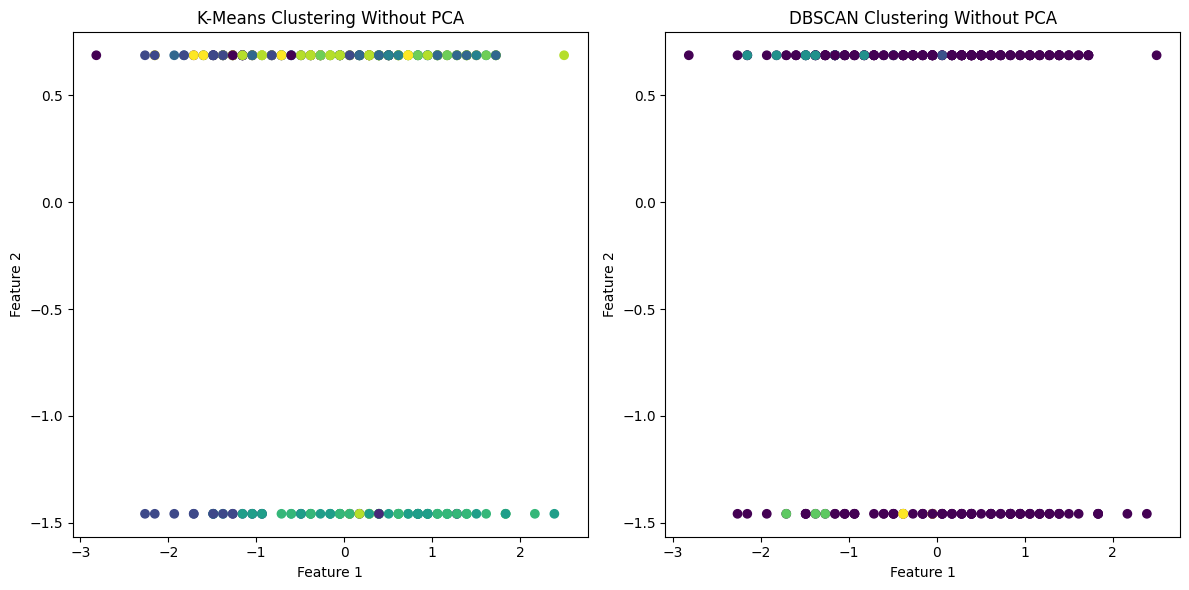

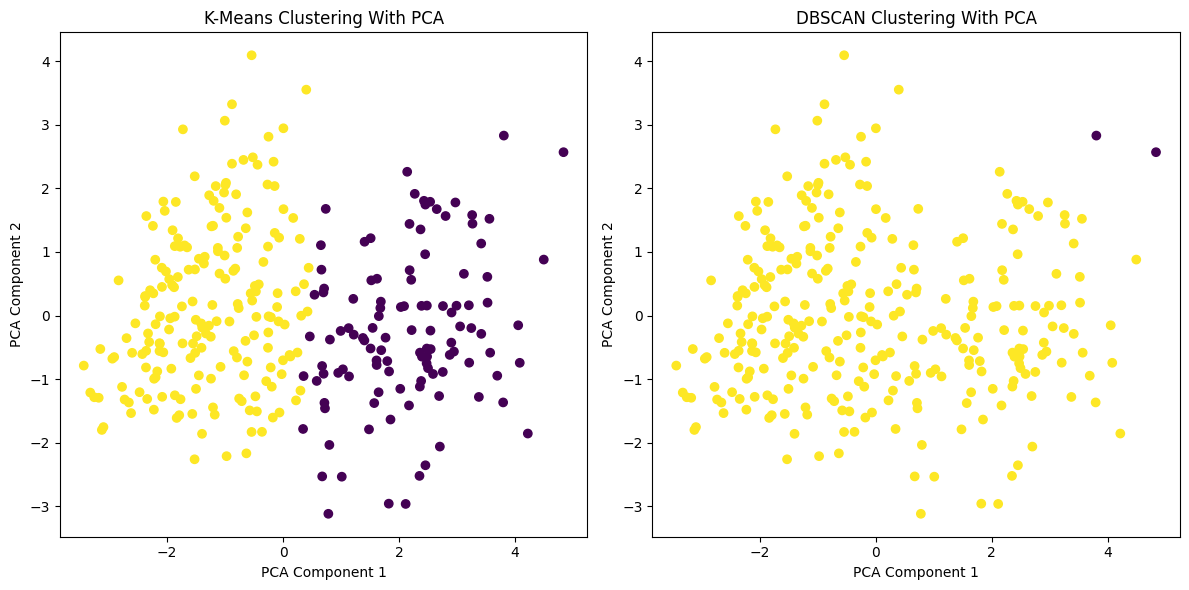

In [ ]:
# K-Means clustering without PCA
kmeans_labels = kmeans.fit_predict(scaled_data)

# DBSCAN clustering without PCA
dbscan_labels = dbscan.fit_predict(scaled_data)

# Visualize clusters without PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering Without PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Visualize clusters with PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca_labels, cmap='viridis')
plt.title('K-Means Clustering With PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_pca_labels, cmap='viridis')
plt.title('DBSCAN Clustering With PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# Conclusion: Which method seems more accurate in understanding the dataset?

---

##**Results:**

**Without PCA**

*K-Means*
   - The clustering results are spread out in a horizontal line with multiple colors.
   - This indicates that K-Means is struggling to find meaningful clusters without PCA, perhaps due to the data's high dimensionality or feature distribution.

*DBSCAN*
   - The data points all have the same color.
   - This may indicate that DBSCAN has identified all data points as belonging to a single cluster, indicating that DBSCAN did not find enough differences in the data to split it.

**With PCA**

*K-Means*
   - The data points are clearly divided into two clusters.
   - This indicates that K-Means is effectively identifying clusters when PCA is applied.

*DBSCAN*
   - The data points are mostly assigned to a single cluster, with only a few points classified as noise (purple).
   - This suggests that DBSCAN is not identifying distinct clusters as well as K-Means.
---

**Conclusion:**

##K-Means seems more accurate in understanding the dataset.
- K-Means with PCA appears to be the most effective method in this case, as it clearly separates the data into two clusters.
- DBSCAN proves to be unworthy of competing with K-Means in this case.
- Overall, **K-Means with PCA** seems more accurate for understanding the dataset based on the clarity and separation of clusters in the provided plots.

Moereover, there is more noteworthy ocassions that were explored in this report that suggest K-Means to be superior:
- The visualization of clusters showed more uniformly divided clusters for K-Means, as well as a firm optimal amount of 2 clusters
- K-Mean's silhouette plot  comprehensievly showed appropriate clustering (DBSCAN did not)
- The statistical summary for K-Means was of value, meanwhile DBSCAN gave poor results.
- Experimenting with different hyperparameters with K-Means was easier too, more viable with different settings, indicating better functionality in regards to clustering. DBSCAN only gave a silhouette score with one different parameter setting, seriously limiting exploration.

Nonetheless, there may be ocassions in which DBSCAN proves useful, but for this dataset, K-Means was better.